<a href="https://colab.research.google.com/github/Ramisrkit/Car_Evaluation_prediction/blob/main/Car_Evaluation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

In [23]:
df=pd.read_csv('/content/car_evaluation.csv',header=None,names=['buying','maint','doors','persons','lug_boot','safety','Class'])

In [24]:
df


,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [25]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
Class,0


In [26]:
df.duplicated().value_counts()

,count
False,1728


In [27]:
df.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
Class,object


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
category=df.select_dtypes(include='object').columns.drop('Class')
category

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])



In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop(['Class'],axis=1),df['Class'],random_state=42,test_size=0.2)

In [125]:
dt=DecisionTreeClassifier(max_depth=11,min_samples_split=10,min_samples_leaf=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=10)

In [172]:
y_pred=dt.predict(x_test)

In [127]:
dt.score(x_train,y_train)

0.9768451519536903

In [128]:
dt.score(x_test,y_test)

0.9335260115606936

In [132]:
parameters={
     "max_depth":[3,5,7,9,11,13,15],
     "min_samples_split":[10,20,25,30,35,40],
     "min_samples_leaf":[1,2,3,4,5]
}


In [130]:

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dt,param_grid=parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.score(x_test,y_test)

0.9335260115606936

In [131]:
grid.best_params_

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [141]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
t=confusion_matrix(y_test,dt.predict(x_test))
t

array([[ 65,  12,   6,   0],
       [  0,  11,   0,   0],
       [  1,   0, 234,   0],
       [  2,   2,   0,  13]])

In [136]:
precision_score(y_test,dt.predict(x_test),average='weighted')

0.954633628017681

In [137]:
f1_score(y_test,dt.predict(x_test),average='weighted')

0.9377148881595457

In [142]:
recall_score(y_test,dt.predict(x_test),average='weighted')

0.9335260115606936

In [155]:
from sklearn.decomposition import PCA
g=PCA(n_components=2)
t=g.fit_transform(x_train)

In [157]:
import matplotlib.pyplot as plt

In [177]:
import numpy as np
list1 = np.unique(y_pred)

In [181]:
y_codes = pd.Categorical(y_train).codes

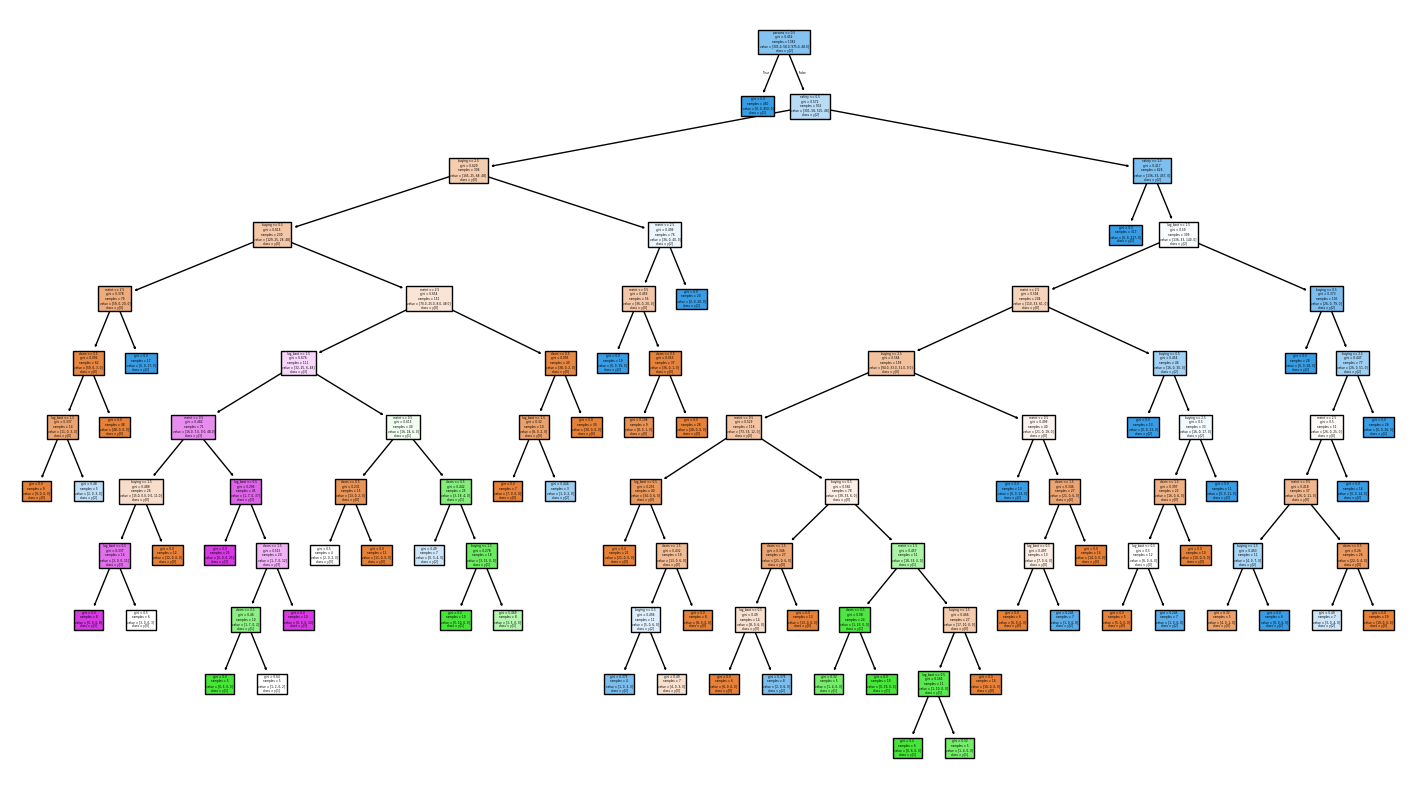

In [184]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(dt, filled=True, feature_names=x_train.columns, class_names=True)
plt.show()
